<a href="https://colab.research.google.com/github/SouravDas177/practice/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd

In [93]:
df=pd.read_csv("/content/Morning_Routine_Productivity_Dataset.csv")

In [94]:
df.head()

,Date,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Notes
0,2023-02-01 10:21:52.870632,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,Collection whole decision middle.
1,2023-02-02 10:21:52.870632,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,Tree player behavior various up such attention...
2,2023-02-03 10:21:52.870632,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,If hard focus nor trip forward change per.
3,2023-02-04 10:21:52.870632,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,Physical threat federal with thing.
4,2023-02-05 10:21:52.870632,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,Ground class Mr future.


In [95]:
df.isnull().sum()

,0
Date,0
Wake-up Time,0
Sleep Duration (hrs),0
Meditation (mins),0
Exercise (mins),0
Breakfast Type,0
Journaling (Y/N),0
Work Start Time,0
Productivity Score (1-10),0
Mood,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       900 non-null    object 
 1   Wake-up Time               900 non-null    object 
 2   Sleep Duration (hrs)       900 non-null    float64
 3   Meditation (mins)          900 non-null    int64  
 4   Exercise (mins)            900 non-null    int64  
 5   Breakfast Type             900 non-null    object 
 6   Journaling (Y/N)           900 non-null    object 
 7   Work Start Time            900 non-null    object 
 8   Productivity Score (1-10)  900 non-null    int64  
 9   Mood                       900 non-null    object 
 10  Notes                      900 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 77.5+ KB


In [97]:
df=df.drop(["Date","Notes"],axis=1)

In [98]:
df.head()

,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood
0,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral
1,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy
2,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy
3,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy
4,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy


In [99]:
df['Wakeup_Hour'] = pd.to_datetime(df['Wake-up Time']).dt.hour + pd.to_datetime(df['Wake-up Time']).dt.minute / 60.0

/tmp/ipython-input-3728233578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Wakeup_Hour'] = pd.to_datetime(df['Wake-up Time']).dt.hour + pd.to_datetime(df['Wake-up Time']).dt.minute / 60.0
/tmp/ipython-input-3728233578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Wakeup_Hour'] = pd.to_datetime(df['Wake-up Time']).dt.hour + pd.to_datetime(df['Wake-up Time']).dt.minute / 60.0


In [100]:
df.head()

,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Wakeup_Hour
0,5:30 AM,6.6,20,60,Protein-rich,Yes,6:30 AM,6,Neutral,5.50
1,8:15 AM,8.0,5,50,Heavy,No,11:15 AM,7,Happy,8.25
2,8:30 AM,8.9,25,30,Carb-rich,Yes,10:30 AM,10,Happy,8.50
3,5:00 AM,8.4,25,30,Skipped,Yes,7:00 AM,7,Happy,5.00
4,5:15 AM,8.2,25,30,Heavy,No,6:15 AM,10,Happy,5.25


In [101]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [102]:
df["Mood"].value_counts()

,count
Mood,
Sad,315
Happy,313
Neutral,272


In [103]:
label=LabelEncoder()
df["Mood"]=label.fit_transform(df["Mood"])

In [104]:
label.inverse_transform([0,1,2])

array(['Happy', 'Neutral', 'Sad'], dtype=object)

In [105]:
df["Work Start Time"]=pd.to_datetime(df["Work Start Time"]).dt.hour+pd.to_datetime(df["Work Start Time"]).dt.minute/60.0

/tmp/ipython-input-3246501040.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Work Start Time"]=pd.to_datetime(df["Work Start Time"]).dt.hour+pd.to_datetime(df["Work Start Time"]).dt.minute/60.0
/tmp/ipython-input-3246501040.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Work Start Time"]=pd.to_datetime(df["Work Start Time"]).dt.hour+pd.to_datetime(df["Work Start Time"]).dt.minute/60.0


In [106]:
df.head()

,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Wakeup_Hour
0,5:30 AM,6.6,20,60,Protein-rich,Yes,6.50,6,1,5.50
1,8:15 AM,8.0,5,50,Heavy,No,11.25,7,0,8.25
2,8:30 AM,8.9,25,30,Carb-rich,Yes,10.50,10,0,8.50
3,5:00 AM,8.4,25,30,Skipped,Yes,7.00,7,0,5.00
4,5:15 AM,8.2,25,30,Heavy,No,6.25,10,0,5.25


In [107]:
ordinal=OrdinalEncoder(categories=[["No","Yes"]])
df["Journaling (Y/N)"]=ordinal.fit_transform(df[["Journaling (Y/N)"]])


In [108]:
df["Breakfast Type"].value_counts()

,count
Breakfast Type,
Heavy,197
Carb-rich,189
Protein-rich,173
Light,172
Skipped,169


In [109]:
ordinal2=OrdinalEncoder(categories=[["Skipped","Light","Protein-rich","Carb-rich","Heavy"]])
df["Breakfast Type"]=ordinal2.fit_transform(df[["Breakfast Type"]])

In [110]:
df.head()

,Wake-up Time,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Wakeup_Hour
0,5:30 AM,6.6,20,60,2.0,1.0,6.50,6,1,5.50
1,8:15 AM,8.0,5,50,4.0,0.0,11.25,7,0,8.25
2,8:30 AM,8.9,25,30,3.0,1.0,10.50,10,0,8.50
3,5:00 AM,8.4,25,30,0.0,1.0,7.00,7,0,5.00
4,5:15 AM,8.2,25,30,4.0,0.0,6.25,10,0,5.25


In [111]:
df=df.drop(["Wake-up Time"],axis=1)

In [112]:
df.head()

,Sleep Duration (hrs),Meditation (mins),Exercise (mins),Breakfast Type,Journaling (Y/N),Work Start Time,Productivity Score (1-10),Mood,Wakeup_Hour
0,6.6,20,60,2.0,1.0,6.50,6,1,5.50
1,8.0,5,50,4.0,0.0,11.25,7,0,8.25
2,8.9,25,30,3.0,1.0,10.50,10,0,8.50
3,8.4,25,30,0.0,1.0,7.00,7,0,5.00
4,8.2,25,30,4.0,0.0,6.25,10,0,5.25


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sleep Duration (hrs)', ylabel='Count'>

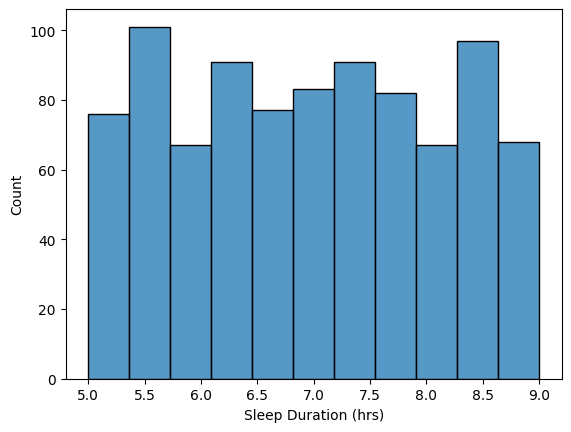

In [114]:
sns.histplot(df["Sleep Duration (hrs)"])

<Axes: ylabel='Sleep Duration (hrs)'>

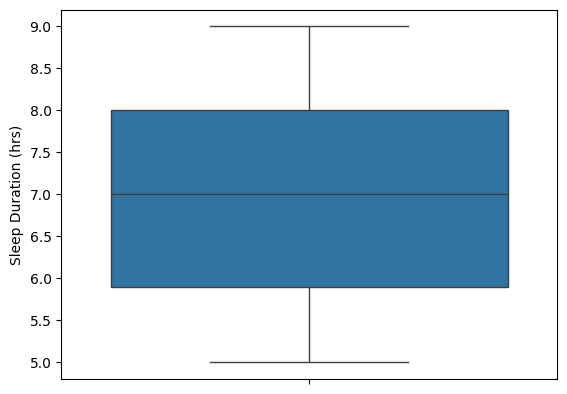

In [115]:
sns.boxplot(df["Sleep Duration (hrs)"])

<Axes: xlabel='Meditation (mins)', ylabel='Count'>

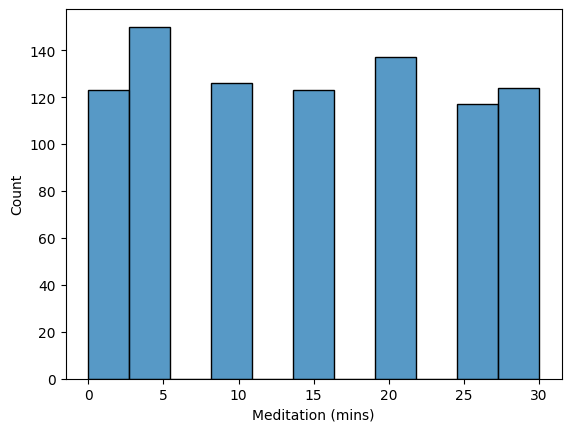

In [116]:
sns.histplot(df["Meditation (mins)"])

<Axes: ylabel='Meditation (mins)'>

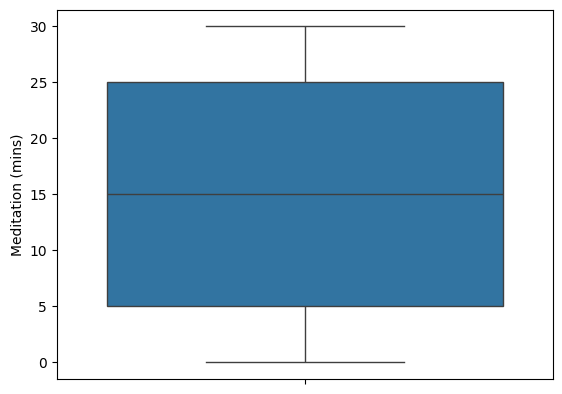

In [117]:
sns.boxplot(df["Meditation (mins)"])

<Axes: xlabel='Exercise (mins)', ylabel='Count'>

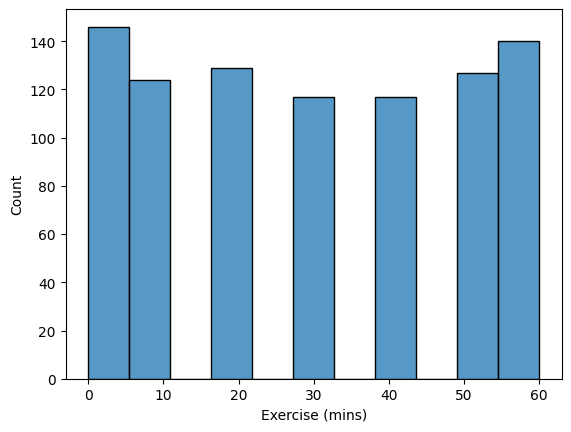

In [118]:
sns.histplot(df["Exercise (mins)"])

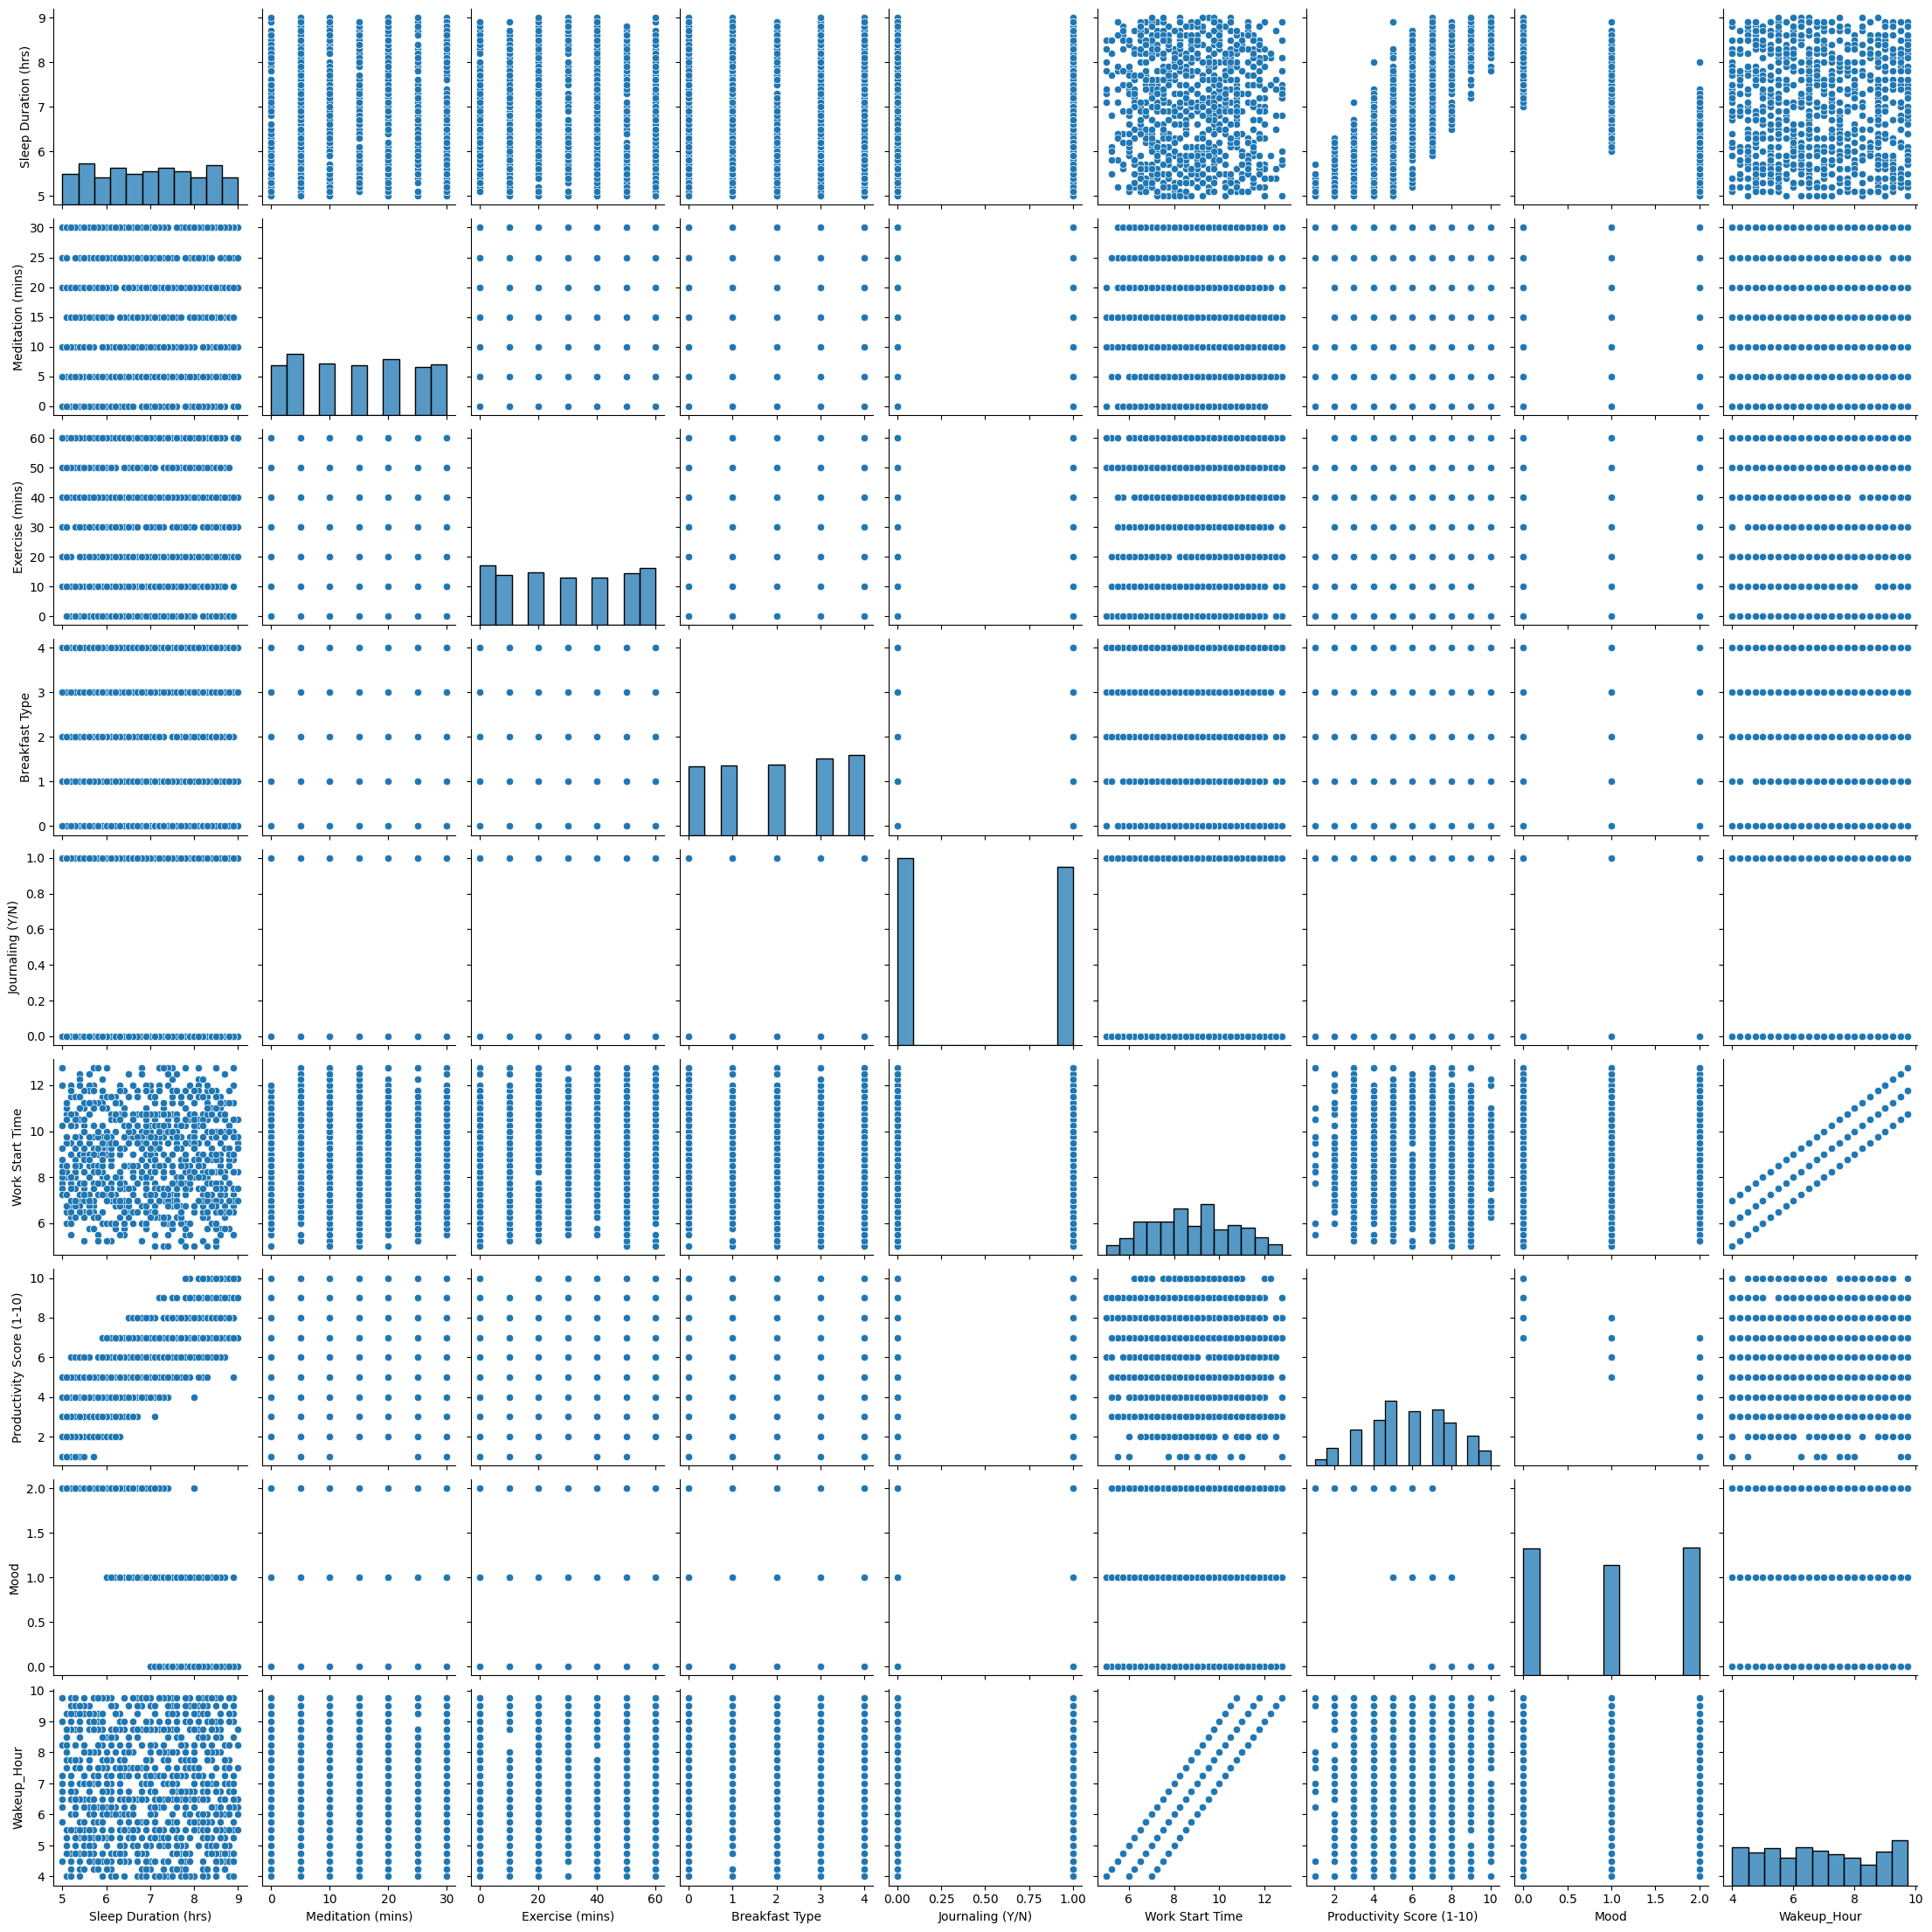

In [119]:
sns.pairplot(df)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import pandas as pd

In [121]:
x,y=df.drop("Mood",axis=1),df["Mood"]

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
logistic=LogisticRegression(multi_class="multinomial", max_iter=1000)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVR()

logistic.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svm.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVR()

In [124]:
from sklearn.metrics import accuracy_score,r2_score


In [125]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

print("logistic accuracy is -->" ,accuracy_score(y_test,logistic.predict(x_test)))
print("decision tree r2 score is -->" ,r2_score(y_test,dt.predict(x_test)))
print("random forest r2 score is -->" ,r2_score(y_test,rf.predict(x_test)))
print("svm r2 score is -->" ,r2_score(y_test,svm.predict(x_test)))

logistic accuracy is --> 0.9111111111111111
decision tree r2 score is --> 0.9841269841269842
random forest r2 score is --> 0.9761904761904762
svm r2 score is --> 0.7770241234983389
